In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

import neuro_morpho_toolbox as nmt
%matplotlib inline
#ns=nmt.neuron_set('/home/penglab/Documents/Janelia_1000')
import pickle
pickle_in = open("/home/penglab/FeaCal/ns.pickle","rb")
example_ = pickle.load(pickle_in)
ns= example_[0]

/home/penglab/anaconda3/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning:

Embedding a total of 8 separate connected components using meta-embedding (experimental)



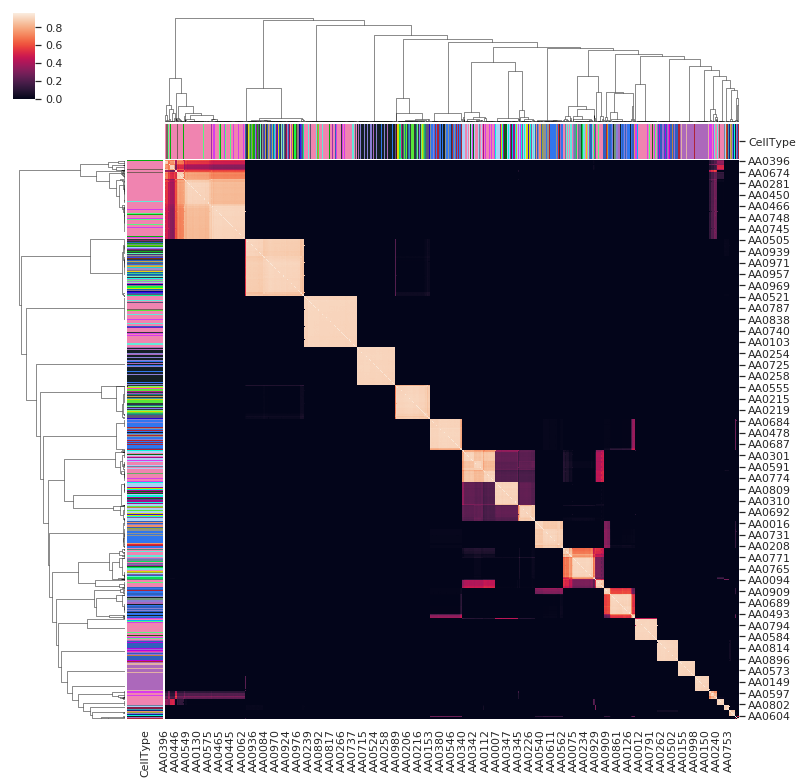

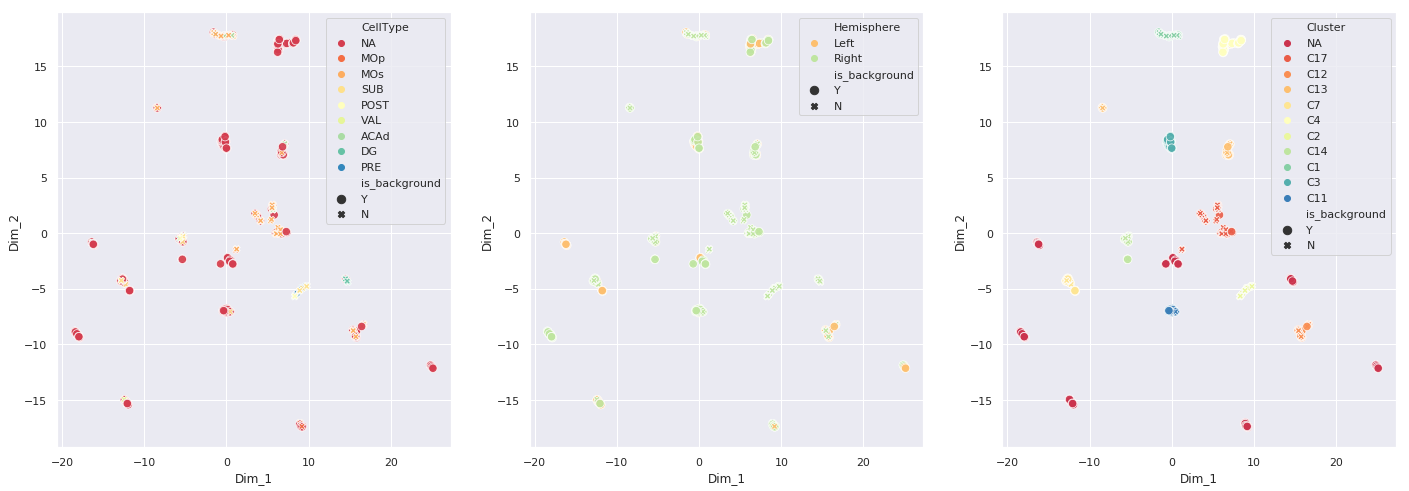

In [57]:
Ztemp= bestCOCLUSTER(AP_hierDF/(5000))

generateNS(AP_hierDF/(5000),ns,Ztemp,'/home/penglab/FeaCal/','apHIER_ns')

In [2]:

from scipy.spatial import distance
from scipy.cluster import hierarchy
import numpy as np

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster,inconsistent
#print the cocluster result
#output the linkage matrix
def bestCOCLUSTER(df):
    linkmethod = ['single', 'complete','average','weighted','centroid','median','ward']
    paraDF = pd.DataFrame(columns =['method','CCC'],index = linkmethod)
    paraDF.loc[:,'method'] = linkmethod
    
    for iter_m in linkmethod:
        Y = distance.pdist(np.asarray(df))
        Z = hierarchy.linkage(Y, method = iter_m)
        c, coph_dists = hierarchy.cophenet(Z,Y)
        paraDF.loc[iter_m,'CCC'] = c
    paraDF.sort_values(by='CCC', ascending = False, inplace = True)
    #print(paraDF)
    row_linkage = hierarchy.linkage(distance.pdist(np.asarray(df)), method = paraDF.iloc[0,0])

    col_linkage = hierarchy.linkage(distance.pdist(np.asarray(df).T), method = paraDF.iloc[0,0])
    #print(paraDF.iloc[0,0])
    sns.clustermap(df, row_linkage = row_linkage, col_linkage = col_linkage, row_colors=row_colors ,col_colors = row_colors, figsize=(13, 13))#, cmap=sns.diverging_palette(h_neg=150, h_pos=275, s=80, l=55, as_cmap=True))    
    return hierarchy.linkage(distance.pdist(np.asarray(df)))



def coclusterResult(Z_sample):
    t = 20#input('Please input the number of cluster: ')
    return fcluster(Z_sample,t,criterion='maxclust')

In [3]:
import pickle
def generateNS(featureDF,ns_input,Z_sample,storePath,outname):
    if featureDF.shape!= (0,0):
        pickle_in = open("/home/penglab/FeaCal/ns.pickle","rb")
        example_ = pickle.load(pickle_in)
        ns_input= example_[0]

        index_origin = ns_input.metadata.index.tolist()
        ns_input.UMAP = nmt.UMAP_wrapper(featureDF, n_neighbors=100, min_dist=0.1, n_components=2, metric='euclidean',
                                   PCA_first=True,n_PC=100)
        index_after = ns_input.UMAP.index.tolist()
        if len(index_after)>len(index_origin ):
            index_update = [i for i in index_after if i in index_origin ]
        else:
            index_update = [i for i in index_origin if i in index_after ]
        
        ns_input.metadata = ns_input.metadata.loc[index_update,:]
    cur_clusters = coclusterResult(Z_sample)
    ns_input.metadata['Cluster'] = ['C' + str(i) for i in cur_clusters] 
    _ = ns_input.FeatureScatter(["CellType", "Hemisphere","Cluster"], map="UMAP")
    pickle.dump([ns_input], open(str(storePath)+str(outname)+".pickle", "wb"))
    
    return ns_input

import matplotlib.pyplot as plt
import random

number_of_colors = 150

colorlist_gene = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]
typeR, typeC = np.unique(colorlist, return_counts = True)
colorlist = colorlist_gene[-100:]

In [4]:
AP_hierDF = pd.read_excel('/home/penglab/FeaCal/dataSource/axonProj/AP_hierDF.xlsx', index_col=0)
AP_kmeansDF = pd.read_excel('/home/penglab/FeaCal/dataSource/axonProj/AP_kmeansDF.xlsx', index_col=0)
AP_dbscanDF = pd.read_excel('/home/penglab/FeaCal/dataSource/axonProj/AP_dbscanDF.xlsx', index_col=0)
AP_hdbscanDF = pd.read_excel('/home/penglab/FeaCal/dataSource/axonProj/AP_hdbscanDF.xlsx', index_col=0)
AP_snnDF = pd.read_excel('/home/penglab/FeaCal/dataSource/axonProj/AP_snnDF.xlsx', index_col=0)


SL_hierDF = pd.read_excel('/home/penglab/FeaCal/dataSource/somaLoc/SL_hierDF.xlsx', index_col=0)
SL_kmeansDF = pd.read_excel('/home/penglab/FeaCal/dataSource/somaLoc/SL_kmeansDF.xlsx', index_col=0)
SL_dbscanDF = pd.read_excel('/home/penglab/FeaCal/dataSource/somaLoc/SL_dbscanDF.xlsx', index_col=0)
SL_hdbscanDF = pd.read_excel('/home/penglab/FeaCal/dataSource/somaLoc/SL_hdbscanDF.xlsx', index_col=0)
SL_snnDF = pd.read_excel('/home/penglab/FeaCal/dataSource/somaLoc/SL_snnDF.xlsx', index_col=0)

AM_hierDF = pd.read_excel('/home/penglab/FeaCal/dataSource/axonMor/AM_hierDF.xlsx', index_col=0)
AM_kmeansDF = pd.read_excel('/home/penglab/FeaCal/dataSource/axonMor/AM_kmeansDF.xlsx', index_col=0)
AM_dbscanDF = pd.read_excel('/home/penglab/FeaCal/dataSource/axonMor/AM_dbscanDF.xlsx', index_col=0)
AM_hdbscanDF = pd.read_excel('/home/penglab/FeaCal/dataSource/axonMor/AM_hdbscanDF.xlsx', index_col=0)
AM_snnDF = pd.read_excel('/home/penglab/FeaCal/dataSource/axonMor/AM_snnDF.xlsx', index_col=0)


DM_hierDF = pd.read_excel('/home/penglab/FeaCal/dataSource/denMor/DM_hierDF.xlsx', index_col=0)
DM_kmeansDF = pd.read_excel('/home/penglab/FeaCal/dataSource/denMor/DM_kmeansDF.xlsx', index_col=0)
DM_dbscanDF = pd.read_excel('/home/penglab/FeaCal/dataSource/denMor/DM_dbscanDF.xlsx', index_col=0)


DM_hdbscanDF = pd.read_excel('/home/penglab/FeaCal/dataSource/denMor/DM_hdbscanDF.xlsx', index_col=0)
DM_snnDF = pd.read_excel('/home/penglab/FeaCal/dataSource/denMor/DM_snnDF.xlsx', index_col=0)

In [5]:
colorlist=['#0AAFF6', '#D73CEC', '#CAB421', '#F084B0', '#ED9066', '#90E4BA', '#305FBD', '#3076EE', '#887FD4', '#0BFCD6', '#9B6CD2', '#0C5E16', '#AAD0F5', '#09F7DD', '#8558A1', '#6D84A0', '#B72886', '#AD2437', '#57F780', '#63E9D8', '#8B78D8', '#E42431', '#63B065', '#3948E3', '#4708EA', '#31373F', '#71977A', '#4A8973', '#680AB0', '#AC68BB', '#A0B468', '#C5A452', '#91938B', '#58E639', '#EED9E3', '#D5D806', '#2405D4', '#142025', '#6BF379', '#605578', '#1A837F', '#8370F4', '#98A936', '#E1B0A5', '#A30C8D', '#C2803C', '#A02CAB', '#06AE0D', '#042D8E', '#805C5C', '#6F1ACC', '#E8CD13', '#9E4BC5', '#DEE103', '#32A372', '#95939B', '#67CD08', '#7CBB74', '#862A6A', '#09EF8F', '#355546', '#14D4DD', '#63938E', '#D68E1F', '#3D0CCF', '#E63FAF', '#B801DE', '#419AAE', '#8C1A45', '#E44FCE', '#0CDB56', '#880D29', '#0EF8E5', '#AD0C47', '#17A415', '#423C77', '#CC5710', '#2E5C15', '#5BFDA6', '#3C5515', '#650AD6', '#4E1880', '#6B2E61', '#45CA90', '#293862', '#A889C8', '#1CF83D', '#0C69B2', '#2B7BB0', '#EEA830', '#0B65D0', '#8D7285', '#3766DD', '#C940BD', '#F2BFA0', '#56022B', '#010790', '#524598', '#843408', '#284246']

In [6]:
import seaborn as sns; sns.set()



lut = dict(zip(ns.metadata['CellType'].unique(), colorlist))
row_colors = ns.metadata['CellType'].map(lut)
row_colors[row_colors.isnull()]='white'


## Hierarchy

In [16]:
list_ap = AP_hierDF.index.tolist()
list_sl = SL_hierDF.index.tolist()
a_list = [list_ap,list_sl]
result = set(a_list[0])
for data in a_list[1:]:
    result &= set(data)
remainIDX = list(result)


In [22]:
a=(nmt.UMAP_wrapper(sumHIER, n_neighbors=100, min_dist=0.1, n_components=2, metric='euclidean',
                                   PCA_first=True,n_PC=100))


/home/penglab/anaconda3/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning:

Embedding a total of 7 separate connected components using meta-embedding (experimental)

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.



/home/penglab/anaconda3/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning:

Embedding a total of 7 separate connected components using meta-embedding (experimental)

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.

/home/penglab/anaconda3/lib/python3.7/site-packages/neuro_morpho_toolbox/plot.py:260: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




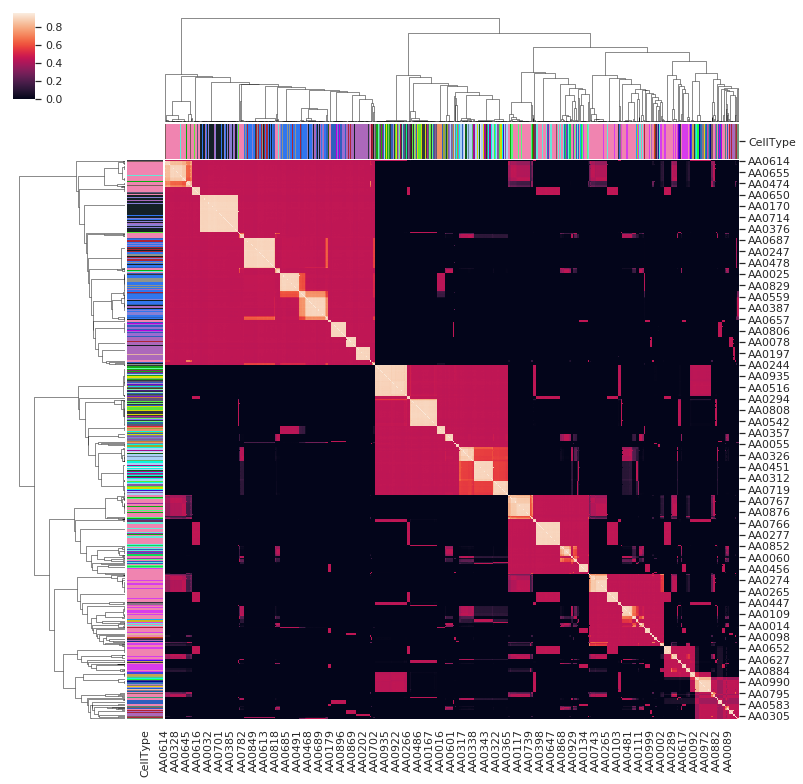

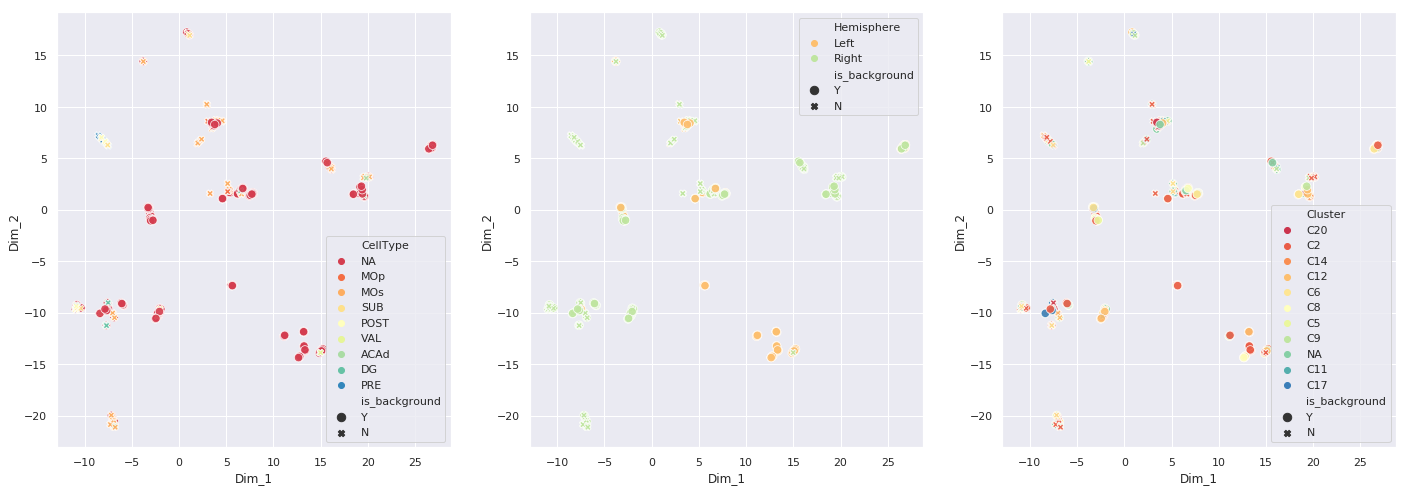

In [49]:
sumHIER = SL_hierDF.loc[remainIDX,remainIDX]+ AP_hierDF.loc[remainIDX,remainIDX]
Ztemp= bestCOCLUSTER(sumHIER/(5000*2))

ns = generateNS(sumHIER,ns,Ztemp,'/home/penglab/FeaCal/','sumHIER2_ns')

In [50]:
Z = linkage(sumHIER/(5000*2),  method='ward', metric='euclidean')

labels_1 = fcluster(Z, t=30, criterion='distance')

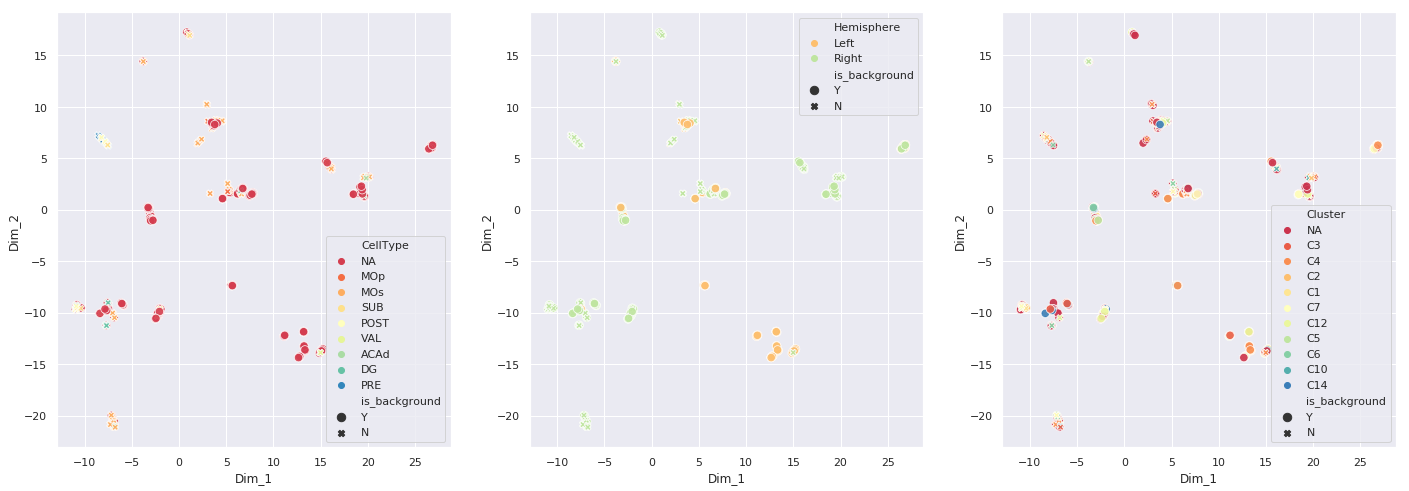

In [53]:
    cur_clusters = fcluster(Z, t=25, criterion='distance')
    ns.metadata['Cluster'] = ['C' + str(i) for i in cur_clusters] 
    _ = ns.FeatureScatter(["CellType", "Hemisphere","Cluster"], map="UMAP")
    pickle.dump([ns], open("/home/penglab/FeaCal/result12Sep.pickle", "wb"))

## Kmeans

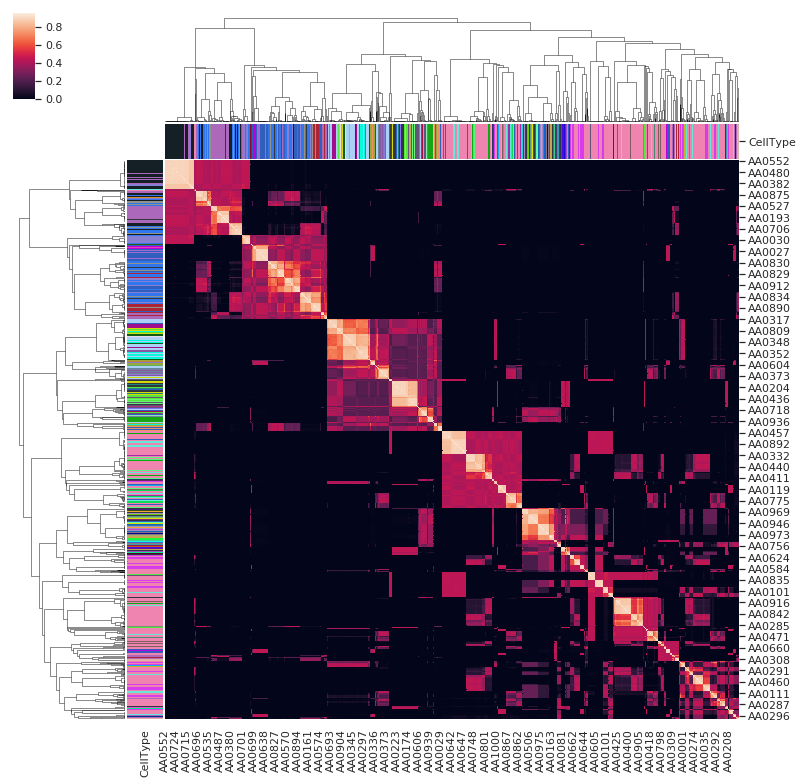

In [9]:
list_ap = AP_kmeansDF.index.tolist()
list_sl = SL_kmeansDF.index.tolist()
a_list = [list_ap,list_sl]
result = set(a_list[0])
for data in a_list[1:]:
    result &= set(data)
remainIDX = list(result)
SUMkmeans = SL_kmeansDF.loc[remainIDX,remainIDX]+ AP_kmeansDF.loc[remainIDX,remainIDX]
Ztemp= bestCOCLUSTER(SUMkmeans/(5000*2))

## DBSCAN

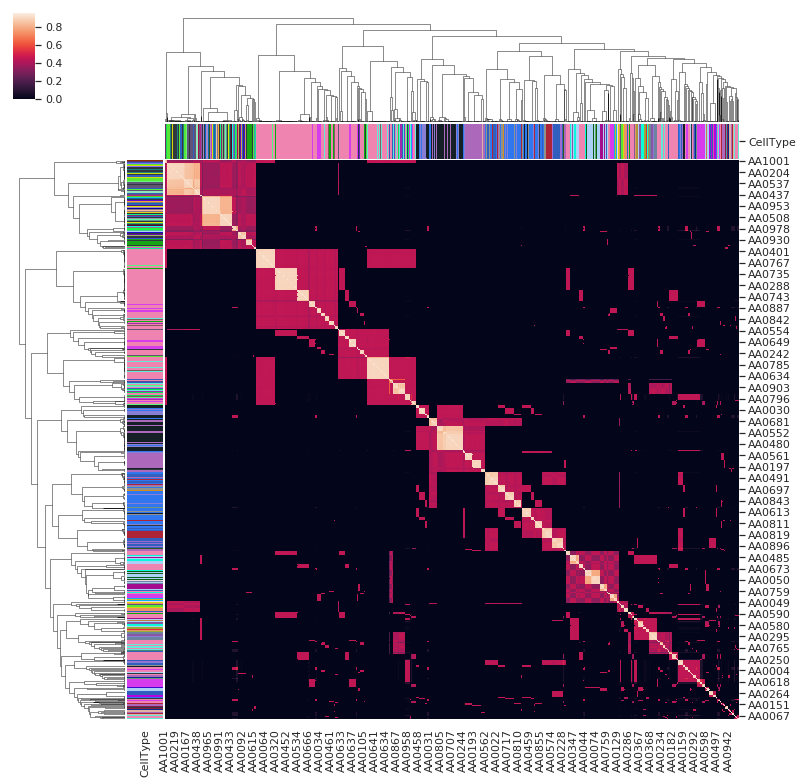

In [10]:
list_ap = AP_dbscanDF.index.tolist()
list_sl = SL_dbscanDF.index.tolist()
a_list = [list_ap,list_sl]
result = set(a_list[0])
for data in a_list[1:]:
    result &= set(data)
remainIDX = list(result)
SUMdbscan = SL_dbscanDF.loc[remainIDX,remainIDX]+ AP_dbscanDF.loc[remainIDX,remainIDX]
Ztemp= bestCOCLUSTER(SUMdbscan/(5000*2))

## HDBSCAN

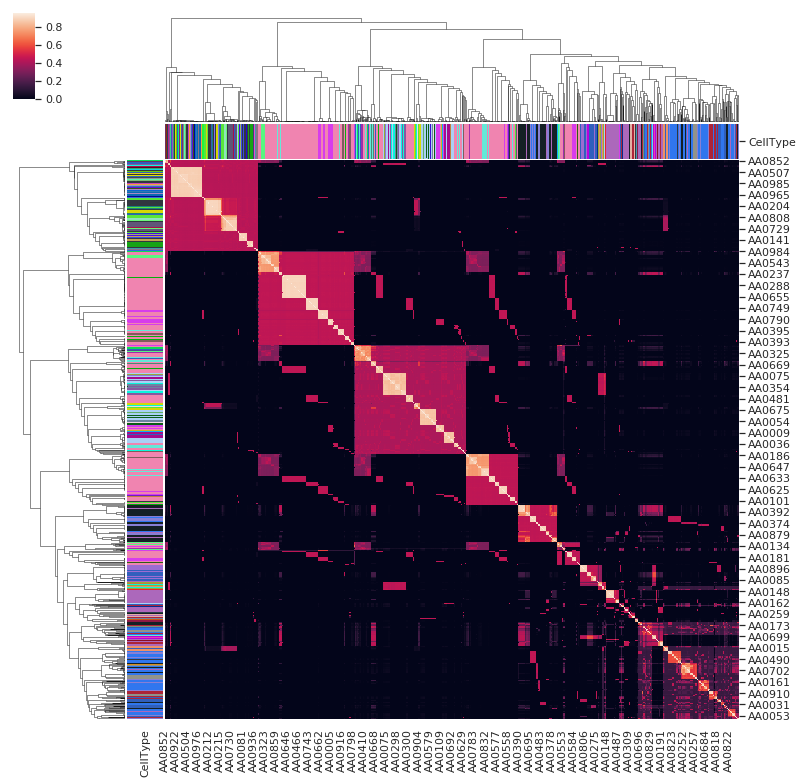

In [11]:
list_ap = AP_hdbscanDF.index.tolist()
list_sl = SL_hdbscanDF.index.tolist()
a_list = [list_ap,list_sl]
result = set(a_list[0])
for data in a_list[1:]:
    result &= set(data)
remainIDX = list(result)
SUMhdbscan = SL_hdbscanDF.loc[remainIDX,remainIDX]+ AP_hdbscanDF.loc[remainIDX,remainIDX]
Ztemp= bestCOCLUSTER(SUMhdbscan/(5000*2))

## SNN

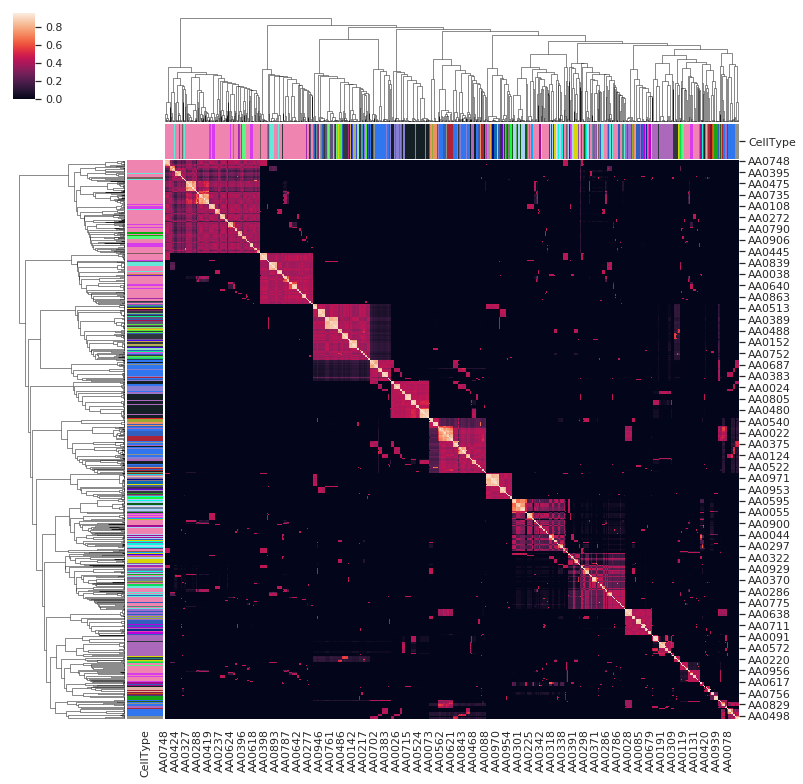

In [12]:
list_ap = AP_snnDF.index.tolist()
list_sl = SL_snnDF.index.tolist()
a_list = [list_ap,list_sl]
result = set(a_list[0])
for data in a_list[1:]:
    result &= set(data)
remainIDX = list(result)
SUMsnn = SL_snnDF.loc[remainIDX,remainIDX]+ AP_snnDF.loc[remainIDX,remainIDX]
Ztemp= bestCOCLUSTER(SUMsnn/(5000*2))

# Without dendrite

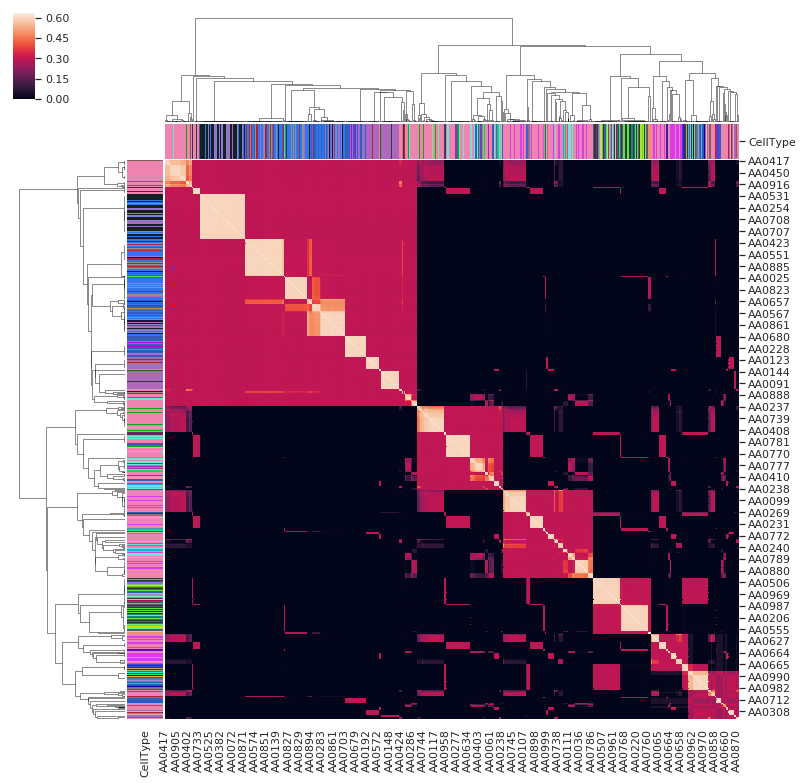

In [13]:
list_ap = AP_hierDF.index.tolist()
list_sl = SL_hierDF.index.tolist()
list_am = AM_hierDF.index.tolist()
a_list = [list_ap,list_sl,list_am]
result = set(a_list[0])
for data in a_list[1:]:
    result &= set(data)
remainIDX = list(result)
sumHIER = SL_hierDF.loc[remainIDX,remainIDX]+ AP_hierDF.loc[remainIDX,remainIDX]+ AM_hierDF.loc[remainIDX,remainIDX]

sumHIER = SL_hierDF.loc[remainIDX,remainIDX]+ AP_hierDF.loc[remainIDX,remainIDX]
Ztemp= bestCOCLUSTER(sumHIER/(5000*3))

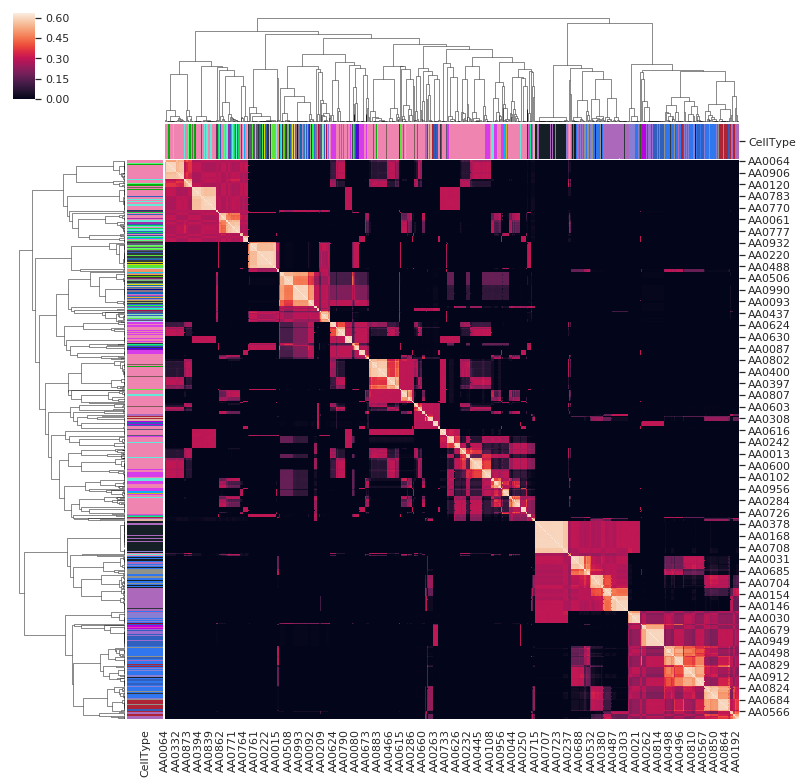

In [14]:
list_ap = AP_kmeansDF.index.tolist()
list_sl = SL_kmeansDF.index.tolist()
list_am = AM_kmeansDF.index.tolist()
a_list = [list_ap,list_sl,list_am]
result = set(a_list[0])
for data in a_list[1:]:
    result &= set(data)
remainIDX = list(result)
sumkmeans = SL_kmeansDF.loc[remainIDX,remainIDX]+ AP_kmeansDF.loc[remainIDX,remainIDX]+ AM_kmeansDF.loc[remainIDX,remainIDX]

sumkmeans = SL_kmeansDF.loc[remainIDX,remainIDX]+ AP_kmeansDF.loc[remainIDX,remainIDX]
Ztemp= bestCOCLUSTER(sumkmeans/(5000*3))

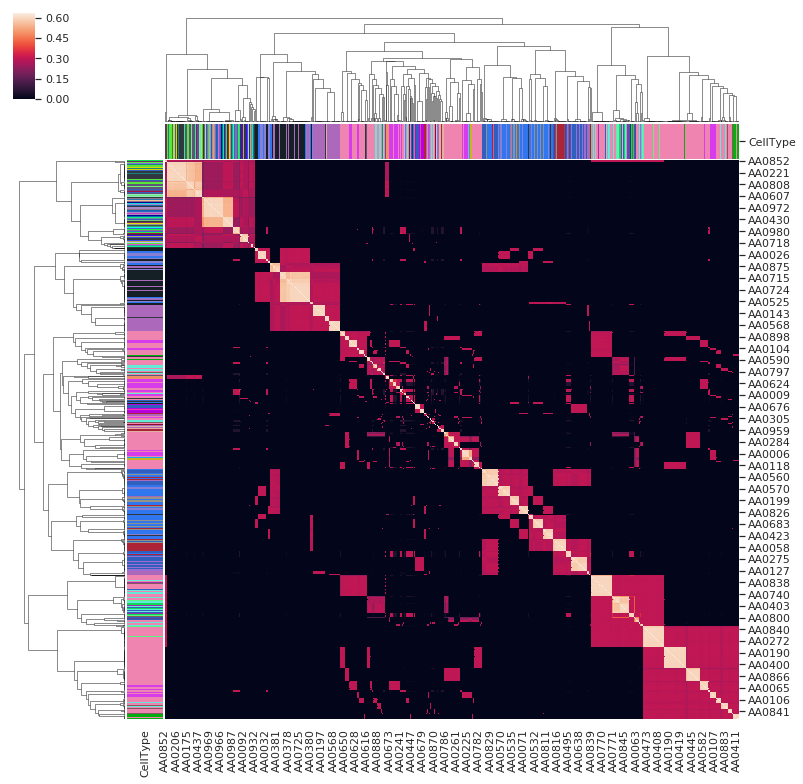

In [15]:
list_ap = AP_dbscanDF.index.tolist()
list_sl = SL_dbscanDF.index.tolist()
list_am = AM_dbscanDF.index.tolist()
a_list = [list_ap,list_sl,list_am]
result = set(a_list[0])
for data in a_list[1:]:
    result &= set(data)
remainIDX = list(result)
sumdbscan = SL_dbscanDF.loc[remainIDX,remainIDX]+ AP_dbscanDF.loc[remainIDX,remainIDX]+ AM_dbscanDF.loc[remainIDX,remainIDX]

sumdbscan = SL_dbscanDF.loc[remainIDX,remainIDX]+ AP_dbscanDF.loc[remainIDX,remainIDX]
Ztemp= bestCOCLUSTER(sumdbscan/(5000*3))